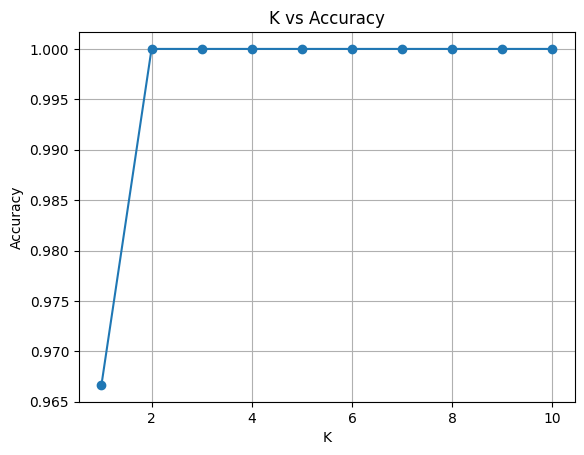

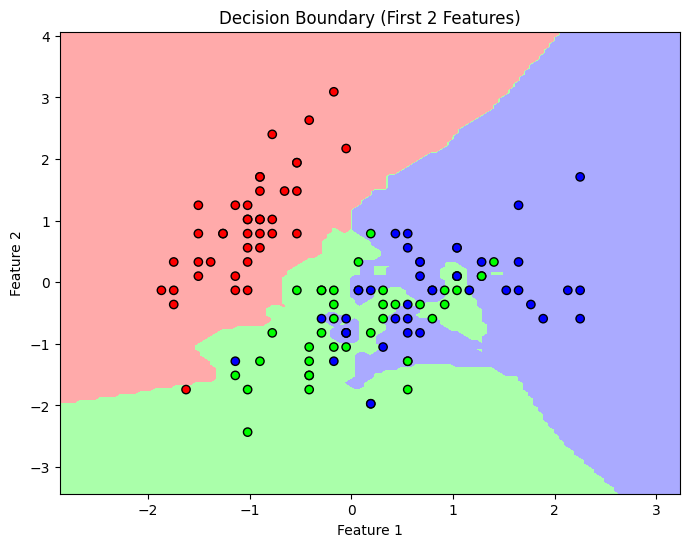

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

accuracies = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)

plt.plot(range(1, 11), accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train[:, :2], y_train)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k')
plt.title("Decision Boundary (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

final_model = KNeighborsClassifier(n_neighbors=3)
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, final_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred))
